# Credit Risk Analysis Model -Lending Club

# __Model selection and Evaluation__

In [14]:
#import all libraries

import itertools
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,auc,average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [15]:
#upload the data with out Grade
data=pd.read_csv('../.../../Capstone Project/data_without_grade.csv')

In [16]:
data

,Loan Amount,Term,Interest Rate,Installment,Annual Income,Loan Status,Dti,Fico Range Low,Fico Range High,Open Acc,...,Addr State_SD,Addr State_TN,Addr State_TX,Addr State_UT,Addr State_VA,Addr State_VT,Addr State_WA,Addr State_WI,Addr State_WV,Addr State_WY
0,17000.0,0,19.03,623.42,105000.00,1,6.17,675.0,679.0,19.0,...,0,0,1,0,0,0,0,0,0,0
1,12000.0,0,7.97,375.88,115000.00,1,3.94,705.0,709.0,7.0,...,0,0,0,0,0,0,0,0,0,0
2,30950.0,0,24.85,1228.12,80000.00,1,27.05,695.0,699.0,19.0,...,0,0,0,0,0,0,0,0,0,0
3,8000.0,0,13.59,271.84,90000.00,0,25.42,660.0,664.0,22.0,...,0,0,0,0,0,0,0,0,0,0
4,20000.0,1,19.03,519.15,35000.00,0,8.30,665.0,669.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73878,35175.0,0,17.09,1255.67,100000.00,0,39.19,680.0,684.0,13.0,...,0,1,0,0,0,0,0,0,0,0
73879,7400.0,0,17.09,264.17,49900.00,1,27.20,660.0,664.0,13.0,...,0,0,0,0,0,0,0,0,0,0
73880,20000.0,0,12.62,670.23,50000.00,0,33.94,700.0,704.0,12.0,...,0,0,1,0,0,0,0,0,0,0
73881,12000.0,1,12.62,270.71,89625.39,1,17.61,660.0,664.0,10.0,...,0,0,0,0,0,0,0,0,0,0


# Baseline model

In [17]:
# set target varibale and independent variable
y=data['Loan Status']
x=data[['Fico Range High','Loan Amount']]


# Balancing oversampling dataset

In [18]:
#using SMOTE function to balancing the data
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x,y = sm.fit_resample(x, y)


In [19]:
print(f'oversample length of x : {len(x)}')
print(f'oversample length of x : {len(y)}')

oversample length of x : 105870
oversample length of x : 105870


In [20]:
#Target balanced
y.value_counts()

1    52935
0    52935
Name: Loan Status, dtype: int64

# Define Base line features

In [21]:
print(x.shape)
print(y.shape)

(105870, 2)
(105870,)


In [22]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(84696, 2) (21174, 2) (84696,) (21174,)


In [23]:
#standralised the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
#define the function for print the score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

__Logistic Regression as Baseline model__

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(x_train, y_train)

LogisticRegression(C=0.0001, random_state=21)

In [26]:
from sklearn.metrics import classification_report
print_score(log_reg, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.5904

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.68      0.62     10569
           1       0.61      0.50      0.55     10605

    accuracy                           0.59     21174
   macro avg       0.59      0.59      0.59     21174
weighted avg       0.59      0.59      0.59     21174


Confusion Matrix: 
 [[7218 3351]
 [5321 5284]]



Accuracy is:  0.589827146500425
              precision    recall  f1-score   support

           0       0.58      0.68      0.62     10569
           1       0.61      0.50      0.55     10605

    accuracy                           0.59     21174
   macro avg       0.59      0.59      0.59     21174
weighted avg       0.59      0.59      0.59     21174



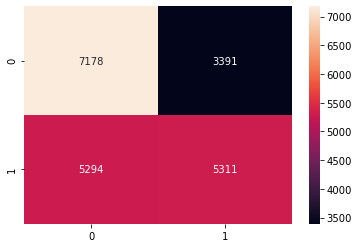

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)
score=lg_model.score(x_test,y_test)


y_pred=lg_model.predict(x_test)
log_ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',log_ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

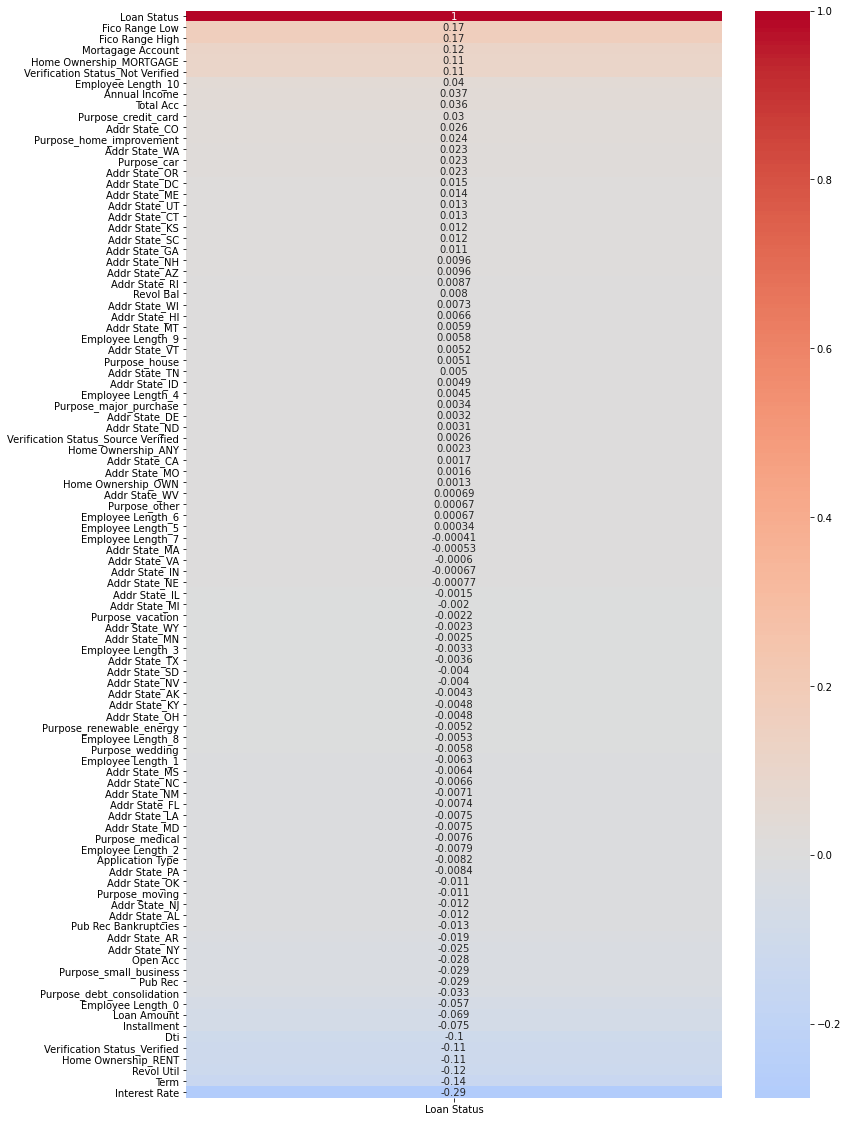

In [17]:
figure=plt.figure(figsize=(12,20))
sns.heatmap(data.corr()[['Loan Status']].sort_values('Loan Status',ascending=False),annot=True,cmap='coolwarm',center=0)

# Model with more features

In [28]:
#set target and independent variables
y=data['Loan Status']
x=data.drop(['Loan Status'],axis=1)

#Balancing the data using smote function
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x,y = sm.fit_resample(x, y)

#splite the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#Stadralize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

(84696, 97) (21174, 97) (84696,) (21174,)


# Ensemble

In [29]:
import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Set the parameters for the classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True,
#     'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'verbose': 0
}

# Extra Trees parameters
et_params = {
    'n_jobs': -1,
    'n_estimators': 500,
#     'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
#     'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}


In [31]:
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed = 0, params = None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self, x, y):
        return self.clf.fit(x, y)
    
    def feature_importances(self, x, y):
        return self.clf.fit(x, y).feature_importances_

In [32]:
# Create the objects that represent our the models
rf  = SklearnHelper(clf = RandomForestClassifier,     seed = SEED, params = rf_params)
et  = SklearnHelper(clf = ExtraTreesClassifier,       seed = SEED, params = et_params)
ada = SklearnHelper(clf = AdaBoostClassifier,         seed = SEED, params = ada_params)
gb  = SklearnHelper(clf = GradientBoostingClassifier, seed = SEED, params = gb_params)


In [ ]:
# Create a dataframe with features
cols = data.columns.values
feature_dataframe = pd.DataFrame({
    'Feature':        cols,
    'Random Forest':  rf.feature_importances(x_train, y_train),
    'Extra Trees':    et.feature_importances(x_train, y_train),
    'AdaBoost':       ada.feature_importances(x_train, y_train),
    'Gradient Boost': gb.feature_importances(x_train, y_train)
})

In [34]:
#Create a function for summary report
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)
    
     # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Random Forest *
*****************
Accuracy : 0.7656 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7666 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7635 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7656                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


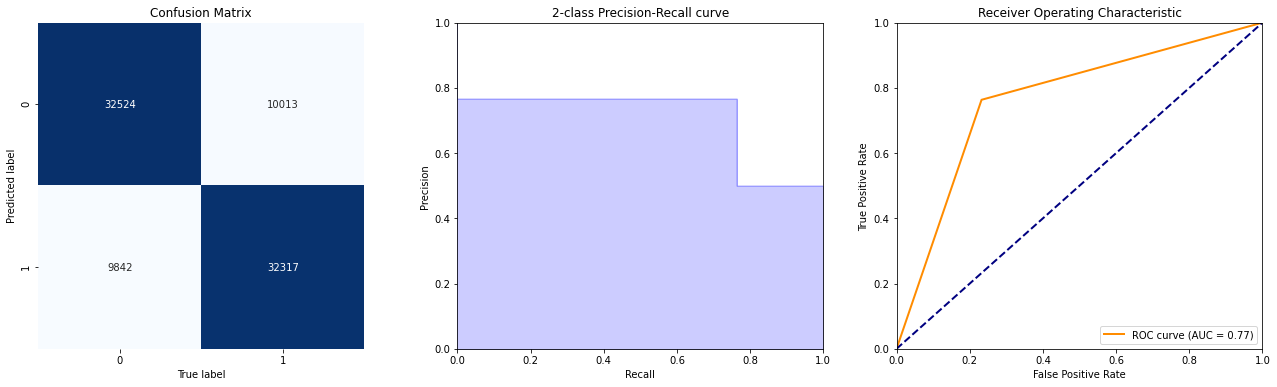


***************
* Extra Trees *
***************
Accuracy : 0.7812 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7475 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8490 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7813                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


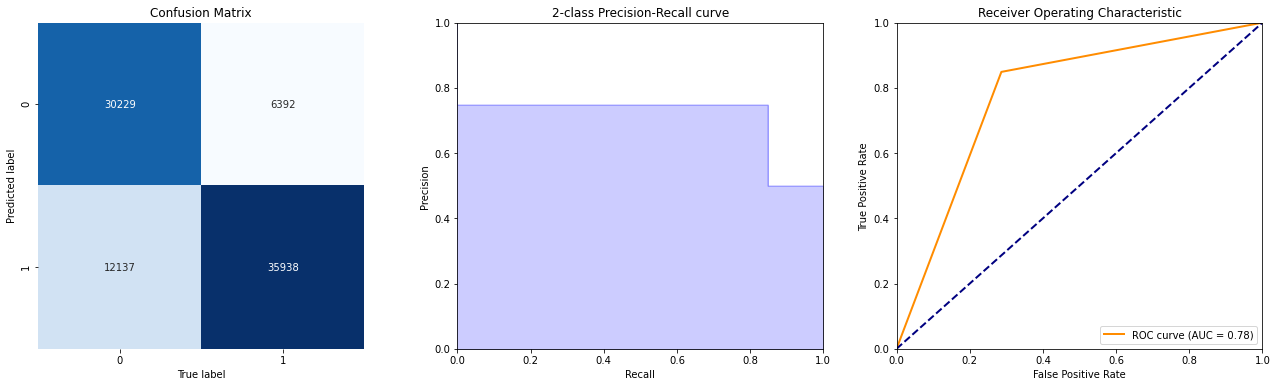


************
* AdaBoost *
************
Accuracy : 0.8136 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7629 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9097 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8136                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


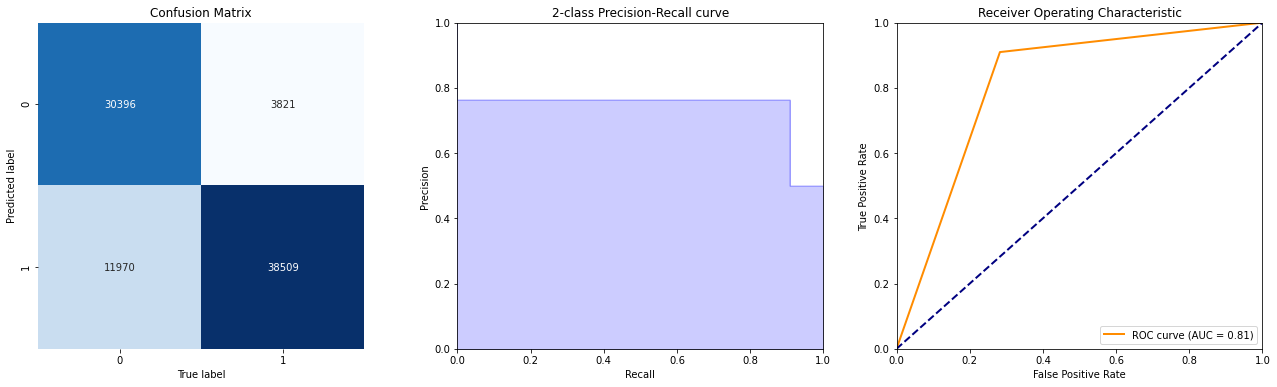


******************
* Gradient Boost *
******************
Accuracy : 0.8614 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8082 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9475 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8614                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


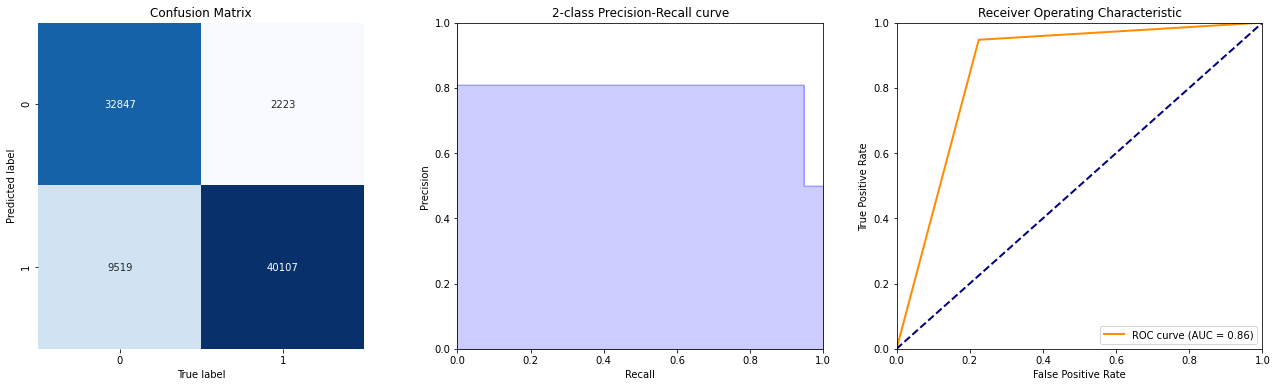

In [35]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Random Forest', 'Extra Trees', 'AdaBoost', 'Gradient Boost']
for i, m in enumerate([rf, et, ada, gb]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(x_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

# XGBoost

In [36]:
#set parametrs for classification
gbm = xgb.XGBClassifier(
#     learning_rate = 0.02,
    n_estimators = 2000,
    max_depth = 4,
    min_child_weight = 2,
#     gamma = 1,
    gamma = 0.9,                        
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'binary:logistic',
    nthread = -1,
    scale_pos_weight = 1)

In [37]:
#create a object of teh model
gbm.fit(x_train, y_train)
predictions = gbm.predict(x_train)

[01:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy : 0.9464 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9170 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9816 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9464                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


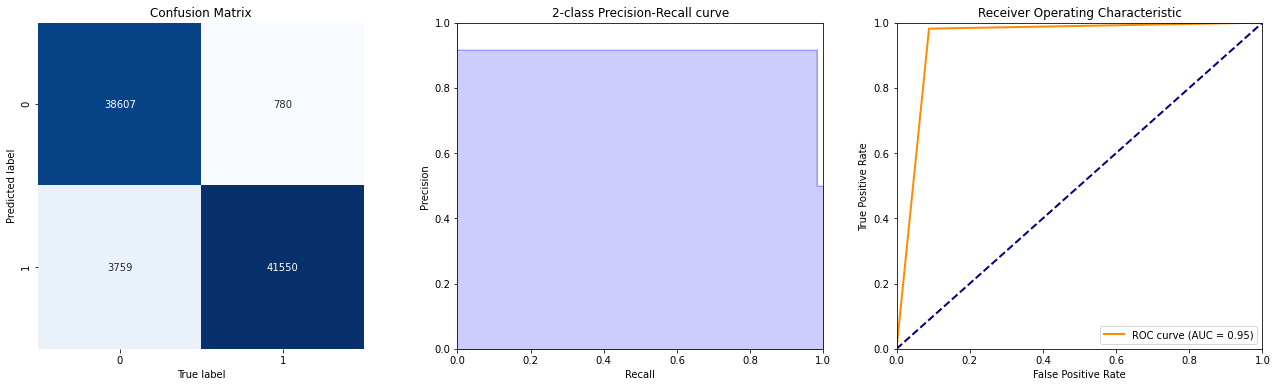

In [38]:
#summary report
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
# keep the results
results.loc[len(results)] = {
    'Model': 'XGBoost', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

# Results of all model

In [39]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Random Forest,0.765573,0.766550,0.763454,0.765572
1,Extra Trees,0.781229,0.747540,0.848996,0.781258
2,AdaBoost,0.813557,0.762872,0.909733,0.813598
3,Gradient Boost,0.861363,0.808185,0.947484,0.861400
4,XGBoost,0.946408,0.917036,0.981573,0.946423


# Top 10 Features to predict Default

__Top 10 Features using XGBoost__

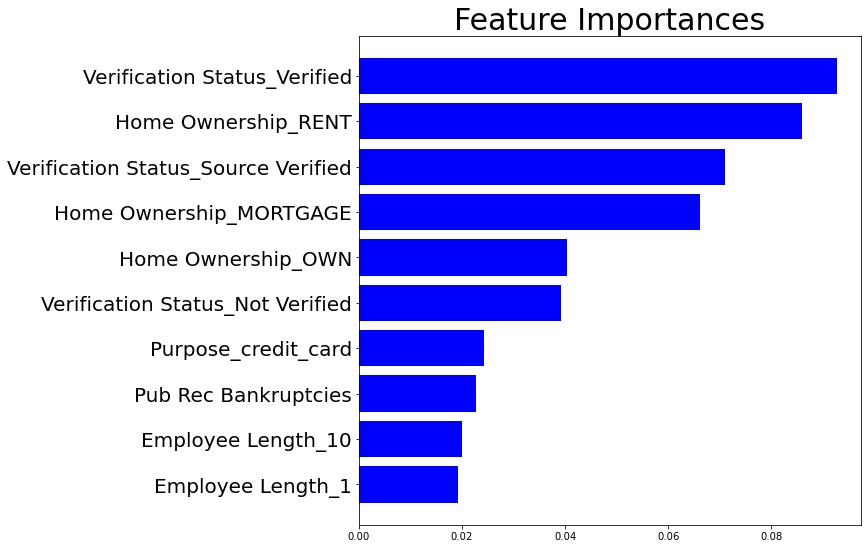

In [43]:
features =x.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(9,9))
plt.title('Feature Importances', size=30)

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]],size=20)
#plt.xlabel('Relative Importance')
plt.show()

__Random Forest Model__

Accuracy : 0.7666 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7676 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7644 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7666                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


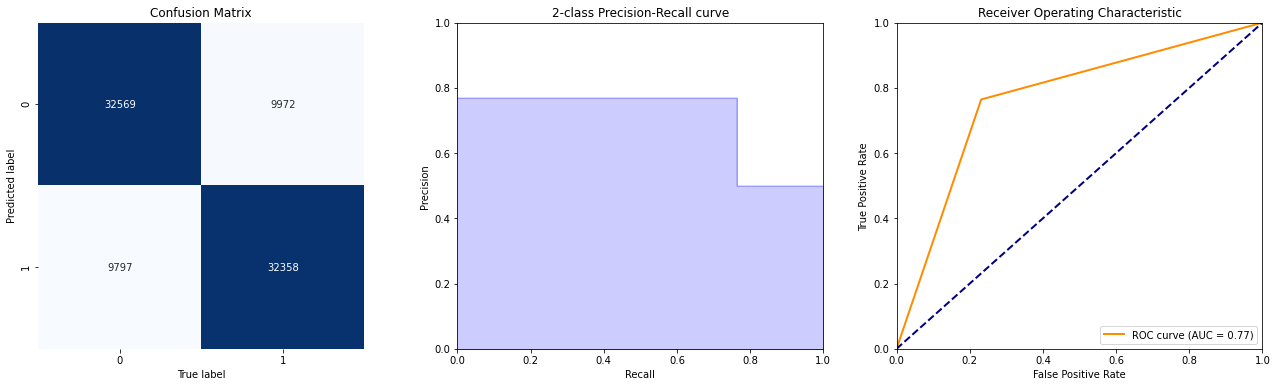

In [31]:
# Random Forest parameters

rfm=RandomForestClassifier(n_jobs= -1,
     n_estimators= 500,
     warm_start= True,
#     'max_features': 0.2,
     max_depth= 6,
     min_samples_leaf= 2,
     max_features= 'sqrt',
     verbose= 0)
rfm.fit(x_train, y_train)
predictions = rfm.predict(x_train)

accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
# keep the results
results.loc[len(results)] = {
    'Model': 'Random', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

 __Top 10 Features using Random Forest Model__

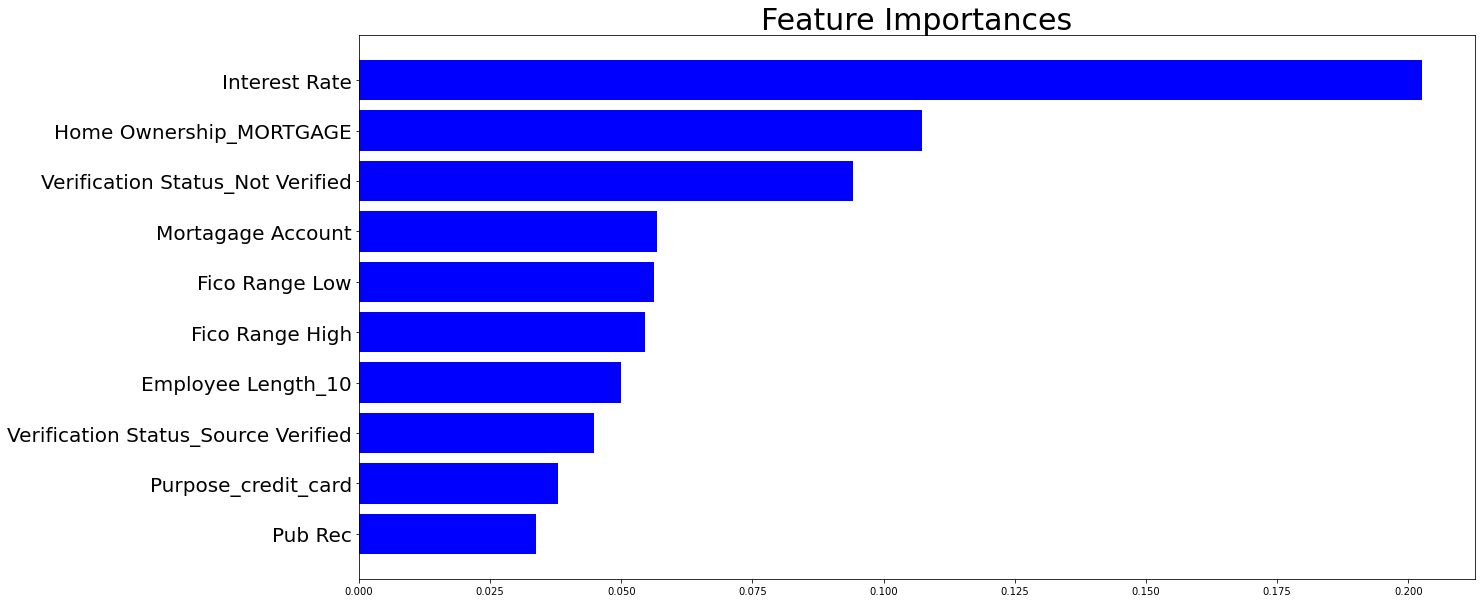

In [32]:
features =x.columns
importances = rfm.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(20,10))
plt.title('Feature Importances', size=30)

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]],size=20)
#plt.xlabel('Relative Importance')
plt.show()

# Nueral Network(Deep Learning)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [34]:
#Define Trget variable
y=data['Loan Status']
x=data.drop(['Loan Status'],axis=1)

#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(59106, 97) (14777, 97)
(59106,) (14777,)


In [35]:
# Normalizing / sclaing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# everything has been scaled between 1 and 0
print('Max: ',x_train.max())
print('Min: ', x_train.min())

Max:  1.0
Min:  0.0


In [36]:
model = Sequential()

# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [37]:
# compile model
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
%%time
# Fit the model
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 10,
    verbose = 1)

Epoch 1/10
2217/2217 [==============================] - 11s 3ms/step - loss: 0.5768 - accuracy: 0.7062 - val_loss: 0.5469 - val_accuracy: 0.7218
Epoch 2/10
2217/2217 [==============================] - 4s 2ms/step - loss: 0.5423 - accuracy: 0.7295 - val_loss: 0.5426 - val_accuracy: 0.7248
Epoch 3/10
2217/2217 [==============================] - 4s 2ms/step - loss: 0.5406 - accuracy: 0.7298 - val_loss: 0.5443 - val_accuracy: 0.7255
Epoch 4/10
2217/2217 [==============================] - 4s 2ms/step - loss: 0.5358 - accuracy: 0.7291 - val_loss: 0.5425 - val_accuracy: 0.7241
Epoch 5/10
2217/2217 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.7348 - val_loss: 0.5406 - val_accuracy: 0.7240
Epoch 6/10
2217/2217 [==============================] - 4s 2ms/step - loss: 0.5291 - accuracy: 0.7340 - val_loss: 0.5417 - val_accuracy: 0.7243
Epoch 7/10
2217/2217 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.7376 - val_loss: 0.5410 - val_accuracy

In [39]:
predictions = model.predict_classes(x_test)

In [40]:
score = model.evaluate(x_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

47/47 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7334

Test loss: 0.532748, Test accuracy: 0.733437


In [41]:
predictions = model.predict_classes(x_test)

print('Classification Report:')
print(classification_report(y_test, predictions))
print('\n')
print('Confusion Matirx:')
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.22      0.32      4189
           1       0.75      0.94      0.83     10588

    accuracy                           0.73     14777
   macro avg       0.67      0.58      0.58     14777
weighted avg       0.70      0.73      0.69     14777



Confusion Matirx:
[[ 930 3259]
 [ 680 9908]]


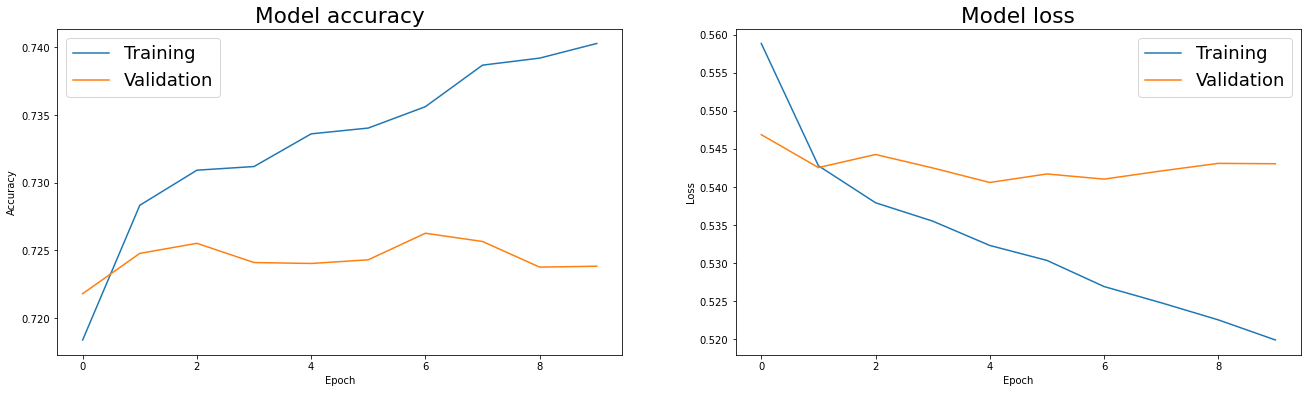

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

# Predicting on new coustemer

In [43]:
import random as rnd
rnd.seed(101)
random_ind = rnd.randint(0,len(data))

new_customer = data.drop('Loan Status',axis=1).iloc[random_ind]
new_customer

Loan Amount       6500.00
Term                 0.00
Interest Rate       14.46
Installment        223.61
Annual Income    63325.00
                   ...   
Addr State_VT        0.00
Addr State_WA        0.00
Addr State_WI        0.00
Addr State_WV        0.00
Addr State_WY        0.00
Name: 25526, Length: 97, dtype: float64

In [46]:
# we need to reshape this to be in the same shape of the training data that the model was trained on
model.predict_classes(new_customer.values.reshape(1,97))

array([[1]])

In [47]:
# the prediction was right
data.iloc[random_ind]['Loan Status']

1.0